In [1]:
# non-linear orthogonal auto-encoder - partial.Generic (w/o EGR ANOVA) - 

In [2]:
ta=[[1,1,2],[1,1,2],[1,1,2]]
tb=[[0.1,1,1],[1,1,1],[1,1,1]]
import numpy as np
print(np.subtract(ta,tb)**2)
print(np.subtract(ta,tb,axis=0))
print(np.subtract(ta,tb,axis=1))

[[0 0 1]
 [0 0 1]
 [0 0 1]]


TypeError: 'axis' is an invalid keyword to ufunc 'subtract'

In [2]:
bucket="relai.poc.data" # aws bucket for sourcing data
folder_base = '/unified_Fx_D3_power_annotated/'  # prev modules: data cleaning/sticthing, feature engineering/extraction, annotations 
csv='.csv' # presently dealing only with csv files

from d2 import get_vin_list #d2 is RelAI specific lib 
f_=get_vin_list(bucket=bucket, folder_base=folder_base, file_extn=csv) # fetches filename list from s3 location

#f_train=get_vin_list(bucket=bucket, folder_base=folder_base_train, file_extn=csv)
#path_test='s3://{}/{}{}{}'.format(bucket, folder_base_test, vin, csv)
#path_train='s3://{}/{}{}{}'.format(bucket, folder_base_train, vin, csv)

In [3]:
from sklearn.model_selection import train_test_split as split
f_train, f_test = split(f_,test_size=0.26, random_state=3)

In [4]:
print(len(f_train), len(f_test))

1013 356


In [5]:
vin_pathlist_test = ['s3://{}/{}{}{}'.format(bucket, folder_base, vin, csv) for vin in f_test]
vin_pathlist_train = ['s3://{}/{}{}{}'.format(bucket, folder_base, vin, csv) for vin in f_train]

#X_train_path  #vin_pathlist_test  #vin_pathlist_train
#len(X_train_path)

In [6]:
len(vin_pathlist_test)

356

In [7]:
import pandas as pd
X_test_list = []
for i in vin_pathlist_test:
    X_test_list.append(pd.read_csv(i))

In [8]:
X_test = pd.concat(X_test_list, axis=0)

In [9]:
X_test.shape

(30234, 255)

In [10]:
X_test.dropna().shape

(30234, 255)

In [11]:
X_test.to_csv('X_test.csv')

In [40]:
'''X_test.fillna(method='ffill', inplace=True)
X_test.fillna(method='bfill', inplace=True)
X_test.dropna().shape'''

"X_test.fillna(method='ffill', inplace=True)\nX_test.fillna(method='bfill', inplace=True)\nX_test.dropna().shape"

In [12]:
import pandas as pd
X_train_list = []
for i in vin_pathlist_train:
    X_train_list.append(pd.read_csv(i))


In [13]:
X_train = pd.concat(X_train_list, axis=0)

In [14]:
X_train.shape

(79611, 255)

In [15]:
X_train.dropna().shape

(79610, 255)

In [16]:
X_train.fillna(method='ffill', inplace=True)
X_train.fillna(method='bfill', inplace=True)
X_train.dropna().shape

(79611, 255)

In [17]:
# X_train, X_test
X_train.to_csv('X_train.csv')

In [18]:
col_list = ['Power_mean',
 'Power_median',
 'Power_variance',
 'Power_max',
 'Power_min',
 'Power_max-min',

 'Power_kurtosis',
 'Power_skewness',
 'engine_speed_mean',
 'engine_speed_median',
 'engine_speed_variance',
 'engine_speed_max',
 'engine_speed_min',
 'engine_speed_max-min',
 
 'engine_speed_kurtosis',
 'engine_speed_skewness',
 'VEHICAL_BATTERY_POTENTIAL_mean',
 'VEHICAL_BATTERY_POTENTIAL_median',
 'VEHICAL_BATTERY_POTENTIAL_variance',
 'VEHICAL_BATTERY_POTENTIAL_max',
 'VEHICAL_BATTERY_POTENTIAL_min',
 'VEHICAL_BATTERY_POTENTIAL_max-min',

 'VEHICAL_BATTERY_POTENTIAL_kurtosis',
 'VEHICAL_BATTERY_POTENTIAL_skewness',
 'FUEL_CONSUM_mean',
 'FUEL_CONSUM_median',
 'FUEL_CONSUM_variance',
 'FUEL_CONSUM_max',
 'FUEL_CONSUM_min',
 'FUEL_CONSUM_max-min',

 'FUEL_CONSUM_kurtosis',
 'FUEL_CONSUM_skewness',
 'THROTTLE_POS_mean',
 'THROTTLE_POS_median',
 'THROTTLE_POS_variance',
 'THROTTLE_POS_max',
 'THROTTLE_POS_min',
 'THROTTLE_POS_max-min',

 'THROTTLE_POS_kurtosis',
 'THROTTLE_POS_skewness',
 'ACTUAL_ENGINE_TORQUE_mean',
 'ACTUAL_ENGINE_TORQUE_median',
 'ACTUAL_ENGINE_TORQUE_variance',
 'ACTUAL_ENGINE_TORQUE_max',
 'ACTUAL_ENGINE_TORQUE_min',
 'ACTUAL_ENGINE_TORQUE_max-min',

 'ACTUAL_ENGINE_TORQUE_kurtosis',
 'ACTUAL_ENGINE_TORQUE_skewness',
 'ENGINE_OIL_TEMP_mean',
 'ENGINE_OIL_TEMP_median',
 'ENGINE_OIL_TEMP_variance',
 'ENGINE_OIL_TEMP_max',
 'ENGINE_OIL_TEMP_min',
 'ENGINE_OIL_TEMP_max-min',

 'ENGINE_OIL_TEMP_kurtosis',
 'ENGINE_OIL_TEMP_skewness',
 'ENGINE_INTAKE_M_PRESSURE_mean',
 'ENGINE_INTAKE_M_PRESSURE_median',
 'ENGINE_INTAKE_M_PRESSURE_variance',
 'ENGINE_INTAKE_M_PRESSURE_max',
 'ENGINE_INTAKE_M_PRESSURE_min',
 'ENGINE_INTAKE_M_PRESSURE_max-min',

 'ENGINE_INTAKE_M_PRESSURE_kurtosis',
 'ENGINE_INTAKE_M_PRESSURE_skewness',
 'ENGINE_INTAKE_M_TEMPERATURE_mean',
 'ENGINE_INTAKE_M_TEMPERATURE_median',
 'ENGINE_INTAKE_M_TEMPERATURE_variance',
 'ENGINE_INTAKE_M_TEMPERATURE_max',
 'ENGINE_INTAKE_M_TEMPERATURE_min',
 'ENGINE_INTAKE_M_TEMPERATURE_max-min',

 'ENGINE_INTAKE_M_TEMPERATURE_kurtosis',
 'ENGINE_INTAKE_M_TEMPERATURE_skewness',
 'ENGINE_AIR_INLET_PRESSURE_mean',
 'ENGINE_AIR_INLET_PRESSURE_median',
 'ENGINE_AIR_INLET_PRESSURE_variance',
 'ENGINE_AIR_INLET_PRESSURE_max',
 'ENGINE_AIR_INLET_PRESSURE_min',
 'ENGINE_AIR_INLET_PRESSURE_max-min',

 'ENGINE_AIR_INLET_PRESSURE_kurtosis',
 'ENGINE_AIR_INLET_PRESSURE_skewness',
 'AMBIENT_AIR_TEMP_mean',
 'AMBIENT_AIR_TEMP_median',
 'AMBIENT_AIR_TEMP_variance',
 'AMBIENT_AIR_TEMP_max',
 'AMBIENT_AIR_TEMP_min',
 'AMBIENT_AIR_TEMP_max-min',
 
 'AMBIENT_AIR_TEMP_kurtosis',
 'AMBIENT_AIR_TEMP_skewness',
 'ENGINE_FUEL_TEMP_1_mean',
 'ENGINE_FUEL_TEMP_1_median',
 'ENGINE_FUEL_TEMP_1_variance',
 'ENGINE_FUEL_TEMP_1_max',
 'ENGINE_FUEL_TEMP_1_min',
 'ENGINE_FUEL_TEMP_1_max-min',

 'ENGINE_FUEL_TEMP_1_kurtosis',
 'ENGINE_FUEL_TEMP_1_skewness',
 'BAT_CHARGING_CURRENT_mean',
 'BAT_CHARGING_CURRENT_median',
 'BAT_CHARGING_CURRENT_variance',
 'BAT_CHARGING_CURRENT_max',
 'BAT_CHARGING_CURRENT_min',
 'BAT_CHARGING_CURRENT_max-min',

 'BAT_CHARGING_CURRENT_kurtosis',
 'BAT_CHARGING_CURRENT_skewness',
 'ENGINE_OIL_PRESSURE_mean',
 'ENGINE_OIL_PRESSURE_median',
 'ENGINE_OIL_PRESSURE_variance',
 'ENGINE_OIL_PRESSURE_max',
 'ENGINE_OIL_PRESSURE_min',
 'ENGINE_OIL_PRESSURE_max-min',
 
 'ENGINE_OIL_PRESSURE_kurtosis',
 'ENGINE_OIL_PRESSURE_skewness',
 'AIR_PRESSURE_1_mean',
 'AIR_PRESSURE_1_median',
 'AIR_PRESSURE_1_variance',
 'AIR_PRESSURE_1_max',
 'AIR_PRESSURE_1_min',
 'AIR_PRESSURE_1_max-min',

 'AIR_PRESSURE_1_kurtosis',
 'AIR_PRESSURE_1_skewness',
 'AIR_PRESSURE_2_mean',
 'AIR_PRESSURE_2_median',
 'AIR_PRESSURE_2_variance',
 'AIR_PRESSURE_2_max',
 'AIR_PRESSURE_2_min',
 'AIR_PRESSURE_2_max-min',

 'AIR_PRESSURE_2_kurtosis',
 'AIR_PRESSURE_2_skewness',
 'AIR_PRESSURE_DIGITAL_mean',
 'AIR_PRESSURE_DIGITAL_median',
 'AIR_PRESSURE_DIGITAL_variance',
 'AIR_PRESSURE_DIGITAL_max',
 'AIR_PRESSURE_DIGITAL_min',
 'AIR_PRESSURE_DIGITAL_max-min',
 
 'AIR_PRESSURE_DIGITAL_kurtosis',
 'AIR_PRESSURE_DIGITAL_skewness',
 'ENG_OIL_DIGITAL_mean',
 'ENG_OIL_DIGITAL_median',
 'ENG_OIL_DIGITAL_variance',
 'ENG_OIL_DIGITAL_max',
 'ENG_OIL_DIGITAL_min',
 'ENG_OIL_DIGITAL_max-min',
 
 'ENG_OIL_DIGITAL_kurtosis',
 'ENG_OIL_DIGITAL_skewness',
 'eng_coolant_temp_mean',
 'eng_coolant_temp_median',
 'eng_coolant_temp_variance',
 'eng_coolant_temp_max',
 'eng_coolant_temp_min',
 'eng_coolant_temp_max-min',

 'eng_coolant_temp_kurtosis',
 'eng_coolant_temp_skewness',
 'distance_idle%',
 'distance_overrun%',
 'distance_decel%',
 'distance_accel%',
 'time_idle%',
 'time_overrun%',
 'time_decel%',
 'time_accel%',
 '5409',
 '535',
 '525569',
 '6912',
 '5888',
 '6144',
 '131363',
 '131619',
 '8501',
 '5688',
 '262288',
 '131895',
 '4386',
 '69888',
 '5169',
 '4356',
 '4406',
 '131906',
 '267048',
 'total',
 '22',
 '4377',
 '408',
 '267012',
 '4390',
 '9502',
 '4369',
 '1315',
 '4371',
 '65939',
 '4613',
 '1028',
 '1025',
 '1030',
 '1156',
 '4614',
 '66104',
 '1159',
 '65816',
 '275',
 '1344',
 '5376',
 '1316',
 '4374',
 '66370',
 '267024',
 '537',
 '663',
 '9501',
 '70434',
 '267042',
 '257',
 '295',
 '6657',
 '131352',
 '5120',
 '6400',
 '66359',
 '1026',
 '4626',
 '1314',
 '267060',
 '4385',
 '5696',
 '4612',
 '533',
 '5634',
 '4375',
 '5159',
 '74065']

In [19]:
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(234)

import sklearn
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
import scipy

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense, Layer, InputSpec
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers, activations, initializers, constraints, Sequential
from keras import backend as K
from keras.constraints import UnitNorm, Constraint

Using TensorFlow backend.


In [20]:
tf.__version__

'1.15.0'

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_train[col_list])

X_train_scaled = scaler.transform(X_train[col_list])

X_test_scaled = scaler.transform(X_test[col_list])

In [22]:
class DenseTied(Layer):
    def __init__(self, units,
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 tied_to=None,
                 **kwargs):
        self.tied_to = tied_to
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super().__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True
                
    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]

        if self.tied_to is not None:
            self.kernel = K.transpose(self.tied_to.kernel)
            self._non_trainable_weights.append(self.kernel)
        else:
            self.kernel = self.add_weight(shape=(input_dim, self.units),
                                          initializer=self.kernel_initializer,
                                          name='kernel',
                                          regularizer=self.kernel_regularizer,
                                          constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        output_shape = list(input_shape)
        output_shape[-1] = self.units
        return tuple(output_shape)

    def call(self, inputs):
        output = K.dot(inputs, self.kernel)
        if self.use_bias:
            output = K.bias_add(output, self.bias, data_format='channels_last')
        if self.activation is not None:
            output = self.activation(output)
        return output

In [23]:
encoding_dim = 24
input_dim = len(col_list)
batch_size = 200
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True) 
decoder = DenseTied(input_dim, activation="linear", tied_to=encoder, use_bias = False)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=3,
                batch_size=batch_size,
                shuffle=True,
                verbose=0)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                5544      
_________________________________________________________________
dense_tied_1 (DenseTied)     (None, 230)               5520      
Total params: 11,064
Trainable params: 5,544
Non-trainable params: 5,520
_________________________________________________________________










In [24]:
w_encoder = np.round(np.transpose(autoencoder.layers[0].get_weights()[0]), 3)
w_decoder = np.round(autoencoder.layers[1].get_weights()[0], 3)
print('Encoder weights\n', w_encoder)
print('Decoder weights\n', w_decoder)

Encoder weights
 [[-0.071  0.076  0.03  ...  0.05  -0.089 -0.149]
 [-0.144 -0.09   0.155 ...  0.098 -0.086  0.014]
 [-0.007 -0.151  0.017 ...  0.054  0.117  0.043]
 ...
 [-0.056 -0.051  0.133 ... -0.067  0.099  0.051]
 [ 0.022 -0.099  0.099 ...  0.133  0.066  0.124]
 [ 0.117 -0.001  0.015 ... -0.015  0.131  0.062]]
Decoder weights
 [[-0.071  0.076  0.03  ...  0.05  -0.089 -0.149]
 [-0.144 -0.09   0.155 ...  0.098 -0.086  0.014]
 [-0.007 -0.151  0.017 ...  0.054  0.117  0.043]
 ...
 [-0.056 -0.051  0.133 ... -0.067  0.099  0.051]
 [ 0.022 -0.099  0.099 ...  0.133  0.066  0.124]
 [ 0.117 -0.001  0.015 ... -0.015  0.131  0.062]]


In [25]:
train_predictions = autoencoder.predict(X_train_scaled)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(X_train_scaled, train_predictions))
test_predictions = autoencoder.predict(X_test_scaled)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(X_test_scaled, test_predictions))

Train reconstrunction error
 0.013005921384764035
Test reconstrunction error
 0.2733842057915587


In [26]:
nb_epoch = 100

encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True) 
decoder = DenseTied(input_dim, activation="linear", tied_to=encoder, use_bias = True)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 24)                5544      
_________________________________________________________________
dense_tied_2 (DenseTied)     (None, 230)               5750      
Total params: 11,294
Trainable params: 5,774
Non-trainable params: 5,520
_________________________________________________________________


In [27]:
w_encoder = np.round(np.transpose(autoencoder.layers[0].get_weights()[0]), 3)
w_decoder = np.round(autoencoder.layers[1].get_weights()[1], 3)
print('Encoder weights\n', w_encoder)
print('Decoder weights\n', w_decoder)

Encoder weights
 [[-0.008 -0.103 -0.136 ...  0.051 -0.036  0.081]
 [ 0.001 -0.036  0.147 ...  0.095 -0.091 -0.088]
 [ 0.089  0.082  0.002 ... -0.098 -0.019 -0.138]
 ...
 [ 0.038  0.093 -0.076 ... -0.134 -0.064  0.133]
 [-0.03  -0.081 -0.052 ... -0.068  0.13   0.028]
 [ 0.015 -0.136  0.135 ...  0.129  0.05  -0.109]]
Decoder weights
 [[-0.008 -0.103 -0.136 ...  0.051 -0.036  0.081]
 [ 0.001 -0.036  0.147 ...  0.095 -0.091 -0.088]
 [ 0.089  0.082  0.002 ... -0.098 -0.019 -0.138]
 ...
 [ 0.038  0.093 -0.076 ... -0.134 -0.064  0.133]
 [-0.03  -0.081 -0.052 ... -0.068  0.13   0.028]
 [ 0.015 -0.136  0.135 ...  0.129  0.05  -0.109]]


In [28]:
b_encoder = np.round(np.transpose(autoencoder.layers[0].get_weights()[1]), 3)
b_decoder = np.round(np.transpose(autoencoder.layers[1].get_weights()[0]), 3)
print('Encoder bias\n', b_encoder)
print('Decoder bias\n', b_decoder)

Encoder bias
 [ 0.021  0.024 -0.009  0.    -0.003  0.001  0.02  -0.017 -0.018 -0.007
  0.004  0.001 -0.02  -0.02  -0.021  0.004 -0.022  0.006  0.016 -0.008
  0.009 -0.009  0.005 -0.025]
Decoder bias
 [ 0.01   0.003  0.001  0.033  0.062 -0.002  0.009  0.046  0.044  0.042
  0.016  0.026 -0.011  0.026  0.006  0.039  0.055  0.028  0.005  0.062
  0.053  0.013 -0.039  0.056  0.007  0.019  0.02   0.045  0.027 -0.018
  0.021  0.043  0.012 -0.006  0.049  0.023 -0.005  0.039 -0.006  0.02
  0.015  0.029  0.032  0.05  -0.001  0.02  -0.015  0.025  0.04  -0.017
 -0.013  0.036  0.051  0.009 -0.01   0.045 -0.022  0.002  0.023 -0.01
 -0.007  0.     0.026  0.02  -0.002  0.007 -0.007  0.008  0.057  0.001
  0.031  0.023  0.045 -0.007  0.02   0.017  0.032 -0.008  0.031  0.025
 -0.023  0.004 -0.004 -0.024 -0.017 -0.006  0.017  0.047  0.009  0.033
  0.007  0.021 -0.005 -0.009 -0.004  0.005  0.045 -0.011 -0.018  0.004
  0.023 -0.034  0.007 -0.001  0.048  0.017  0.005  0.026 -0.014  0.033
  0.028  0.013  0.026

In [29]:
train_predictions = autoencoder.predict(X_train_scaled)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(X_train_scaled, train_predictions))
test_predictions = autoencoder.predict(X_test_scaled)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(X_test_scaled, test_predictions))

Train reconstrunction error
 0.004256277177017816
Test reconstrunction error
 0.25544716440876064


In [30]:
class WeightsOrthogonalityConstraint (Constraint):
    def __init__(self, encoding_dim, weightage = 1.0, axis = 0):
        self.encoding_dim = encoding_dim
        self.weightage = weightage
        self.axis = axis
        
    def weights_orthogonality(self, w):
        if(self.axis==1):
            w = K.transpose(w)
        if(self.encoding_dim > 1):
            m = K.dot(K.transpose(w), w) - K.eye(self.encoding_dim)
            return self.weightage * K.sqrt(K.sum(K.square(m)))
        else:
            m = K.sum(w ** 2) - 1.
            return m

    def __call__(self, w):
        return self.weights_orthogonality(w)

In [31]:
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias=True, kernel_regularizer=WeightsOrthogonalityConstraint(encoding_dim, weightage=1., axis=0)) 
decoder = Dense(input_dim, activation="linear", use_bias = True)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                5544      
_________________________________________________________________
dense_4 (Dense)              (None, 230)               5750      
Total params: 11,294
Trainable params: 11,294
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
w_encoder = autoencoder.layers[0].get_weights()[0]
print('Encoder weights dot product\n', np.round(np.dot(w_encoder.T, w_encoder), 2))

Encoder weights dot product
 [[ 1. -0.  0.  0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0.
   0.  0. -0. -0.  0.  0.]
 [-0.  1.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.
   0. -0.  0. -0.  0. -0.]
 [ 0.  0.  1. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0. -0.
  -0.  0.  0.  0. -0. -0.]
 [ 0.  0. -0.  1. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0. -0.
   0. -0.  0.  0. -0. -0.]
 [ 0. -0.  0. -0.  1. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0.  0. -0.  0.
  -0.  0. -0.  0. -0.  0.]
 [-0.  0.  0.  0. -0.  1. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.
   0. -0.  0. -0.  0. -0.]
 [-0. -0.  0.  0. -0. -0.  1. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.
   0. -0. -0. -0.  0.  0.]
 [-0. -0.  0. -0.  0. -0. -0.  1. -0.  0. -0.  0. -0.  0.  0.  0. -0.  0.
  -0.  0. -0.  0. -0.  0.]
 [ 0.  0. -0.  0. -0.  0.  0. -0.  1. -0.  0. -0.  0. -0. -0.  0. -0. -0.
   0. -0.  0.  0. -0. -0.]
 [-0. -0.  0. -0.  0. -0. -0.  0. -0.  1. -0.  0. -0.  0.  0. 

In [33]:
train_predictions = autoencoder.predict(X_train_scaled)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(X_train_scaled, train_predictions))
test_predictions = autoencoder.predict(X_test_scaled)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(X_test_scaled, test_predictions))

Train reconstrunction error
 0.005830682917710691
Test reconstrunction error
 0.31550189676230933


In [34]:
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias=True, kernel_regularizer=WeightsOrthogonalityConstraint(encoding_dim, weightage=1., axis=0)) 
decoder = Dense(input_dim, activation="linear", use_bias = True, kernel_regularizer=WeightsOrthogonalityConstraint(encoding_dim, weightage=1., axis=1))

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                5544      
_________________________________________________________________
dense_6 (Dense)              (None, 230)               5750      
Total params: 11,294
Trainable params: 11,294
Non-trainable params: 0
_________________________________________________________________


In [35]:
w_encoder = autoencoder.layers[0].get_weights()[0]
print('Encoder weights dot product\n', np.round(np.dot(w_encoder.T, w_encoder), 2))

w_decoder = autoencoder.layers[1].get_weights()[0]
print('Decoder weights dot product\n', np.round(np.dot(w_decoder, w_decoder.T), 2))

Encoder weights dot product
 [[ 1. -0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0. -0. -0.  0.
   0. -0. -0.  0. -0. -0.]
 [-0.  1. -0.  0.  0.  0. -0. -0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0.
   0.  0. -0. -0.  0.  0.]
 [ 0. -0.  1. -0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0. -0. -0. -0. -0.
  -0. -0.  0. -0. -0.  0.]
 [ 0.  0. -0.  1. -0.  0. -0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0. -0.
  -0.  0.  0. -0.  0.  0.]
 [ 0.  0. -0. -0.  1.  0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0.
  -0.  0.  0. -0.  0.  0.]
 [-0.  0. -0.  0.  0.  1. -0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0. -0.
   0.  0.  0. -0.  0.  0.]
 [ 0. -0. -0. -0. -0. -0.  1.  0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.
  -0. -0.  0. -0. -0.  0.]
 [ 0. -0.  0. -0. -0. -0.  0.  1.  0. -0. -0.  0.  0. -0. -0. -0. -0.  0.
  -0. -0.  0.  0. -0. -0.]
 [ 0.  0. -0. -0. -0. -0. -0.  0.  1. -0.  0. -0.  0.  0. -0. -0. -0. -0.
  -0. -0.  0. -0. -0.  0.]
 [ 0.  0. -0. -0.  0.  0. -0. -0. -0.  1.  0. -0. -0.  0.  0. 

In [36]:
class UncorrelatedFeaturesConstraint (Constraint):

    def __init__(self, encoding_dim, weightage=1.0):
        self.encoding_dim = encoding_dim
        self.weightage = weightage

    def get_covariance(self, x):
        x_centered_list = []

        for i in range(self.encoding_dim):
            x_centered_list.append(x[:, i] - K.mean(x[:, i]))

        x_centered = tf.stack(x_centered_list)
        covariance = K.dot(x_centered, K.transpose(x_centered)) / \
            tf.cast(x_centered.get_shape()[0], tf.float32)

        return covariance

    # Constraint penalty
    def uncorrelated_feature(self, x):
        if(self.encoding_dim <= 1):
            return 0.0
        else:
            output = K.sum(K.square(
                self.covariance - tf.math.multiply(self.covariance, K.eye(self.encoding_dim))))
            return output

    def __call__(self, x):
        self.covariance = self.get_covariance(x)
        return self.weightage * self.uncorrelated_feature(x)

In [37]:
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias=True,
                activity_regularizer=UncorrelatedFeaturesConstraint(encoding_dim, weightage=1.))
decoder = Dense(input_dim, activation="linear", use_bias=True)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 24)                5544      
_________________________________________________________________
dense_8 (Dense)              (None, 230)               5750      
Total params: 11,294
Trainable params: 11,294
Non-trainable params: 0
_________________________________________________________________


In [38]:
encoder_layer = Model(inputs=autoencoder.inputs, outputs=autoencoder.layers[0].output)
encoded_features = np.array(encoder_layer.predict(X_train_scaled))
print('Encoded feature covariance\n', np.round(np.cov(encoded_features.T), 3))

Encoded feature covariance
 [[ 0.001  0.     0.    -0.     0.    -0.    -0.     0.     0.    -0.
  -0.     0.    -0.    -0.    -0.    -0.     0.    -0.    -0.     0.
  -0.    -0.    -0.     0.   ]
 [ 0.     0.001 -0.     0.     0.    -0.     0.    -0.     0.     0.
   0.    -0.    -0.     0.    -0.     0.    -0.    -0.     0.     0.
  -0.     0.     0.    -0.   ]
 [ 0.    -0.     0.001  0.    -0.    -0.    -0.     0.     0.    -0.
  -0.    -0.    -0.    -0.    -0.    -0.     0.    -0.    -0.     0.
   0.    -0.    -0.     0.   ]
 [-0.     0.     0.     0.001 -0.     0.     0.    -0.    -0.    -0.
   0.    -0.     0.     0.     0.    -0.     0.    -0.     0.    -0.
  -0.    -0.     0.    -0.   ]
 [ 0.     0.    -0.    -0.     0.001  0.     0.     0.    -0.     0.
  -0.    -0.     0.    -0.    -0.    -0.    -0.     0.     0.    -0.
   0.    -0.    -0.    -0.   ]
 [-0.    -0.    -0.     0.     0.     0.001  0.    -0.    -0.     0.
   0.    -0.    -0.    -0.     0.    -0.    -0.     0.    

In [39]:
train_predictions = autoencoder.predict(X_train_scaled)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(X_train_scaled, train_predictions))
test_predictions = autoencoder.predict(X_test_scaled)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(X_test_scaled, test_predictions))

Train reconstrunction error
 0.00845227080419726
Test reconstrunction error
 0.38790938848754736


In [40]:
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True, kernel_constraint=UnitNorm(axis=0)) 
decoder = Dense(input_dim, activation="linear", use_bias = True)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 24)                5544      
_________________________________________________________________
dense_10 (Dense)             (None, 230)               5750      
Total params: 11,294
Trainable params: 11,294
Non-trainable params: 0
_________________________________________________________________


In [41]:
w_encoder = np.round(autoencoder.layers[0].get_weights()[0], 2).T  # W in Figure 2.
print('Encoder weights norm, \n', np.round(np.sum(w_encoder ** 2, axis = 1),3))

Encoder weights norm, 
 [0.999 1.002 0.995 1.002 1.001 1.001 0.996 1.004 1.    1.012 1.001 0.999
 1.005 1.006 1.001 1.006 1.    1.002 1.002 0.992 1.014 0.994 0.994 1.003]


In [42]:
train_predictions = autoencoder.predict(X_train_scaled)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(X_train_scaled, train_predictions))
test_predictions = autoencoder.predict(X_test_scaled)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(X_test_scaled, test_predictions))

Train reconstrunction error
 0.005603250851666225
Test reconstrunction error
 0.3263081923863532


In [43]:
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True, kernel_constraint=UnitNorm(axis=0)) 
decoder = Dense(input_dim, activation="linear", use_bias = True, kernel_constraint=UnitNorm(axis=1))

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 24)                5544      
_________________________________________________________________
dense_12 (Dense)             (None, 230)               5750      
Total params: 11,294
Trainable params: 11,294
Non-trainable params: 0
_________________________________________________________________


In [44]:
w_encoder = np.round(autoencoder.layers[0].get_weights()[0], 2).T  # W in Figure 2.
w_decoder = np.round(autoencoder.layers[1].get_weights()[0], 2)  # W' in Figure 2.

print('Encoder weights norm, \n', np.round(np.sum(w_encoder ** 2, axis = 1),3))
print('Decoder weights norm, \n', np.round(np.sum(w_decoder ** 2, axis = 1),3))

Encoder weights norm, 
 [1.001 1.002 0.994 1.002 0.995 1.009 0.999 0.997 1.007 1.005 1.    1.012
 1.007 1.005 1.003 1.002 1.003 1.    0.998 1.004 0.994 0.991 1.    1.004]
Decoder weights norm, 
 [0.996 0.997 1.004 1.01  0.999 1.001 1.006 1.    1.005 0.994 1.001 1.006
 1.003 1.004 1.006 1.003 0.993 1.013 1.005 1.009 0.997 1.    1.013 1.005]


In [45]:
train_predictions = autoencoder.predict(X_train_scaled)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(X_train_scaled, train_predictions))
test_predictions = autoencoder.predict(X_test_scaled)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(X_test_scaled, test_predictions))

Train reconstrunction error
 0.0047983591613220255
Test reconstrunction error
 0.28976182184945626


In [51]:
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True, kernel_regularizer=WeightsOrthogonalityConstraint(encoding_dim, weightage=1., axis=0), kernel_constraint=UnitNorm(axis=0)) 
decoder = DenseTied(input_dim, activation="linear", tied_to=encoder, use_bias = False)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=(nb_epoch+300),
                batch_size=(batch_size+50),
                shuffle=True,
                verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 24)                5544      
_________________________________________________________________
dense_tied_5 (DenseTied)     (None, 230)               5520      
Total params: 11,064
Trainable params: 5,544
Non-trainable params: 5,520
_________________________________________________________________


In [52]:
train_predictions = autoencoder.predict(X_train_scaled)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(X_train_scaled, train_predictions))
test_predictions = autoencoder.predict(X_test_scaled)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(X_test_scaled, test_predictions))

Train reconstrunction error
 0.0022972988663335562
Test reconstrunction error
 0.2314895171169397


In [55]:
autoencoder.save("Trained_Autoencoder_V2_22Mar2020.h5")

EncoderM = Sequential()
EncoderM.add(encoder)
EncoderM.save("Trained_Encoder_V2_22Mar2020.h5")

DecoderM = Sequential()
DecoderM.add(decoder)
DecoderM.save("Trained_Decoder_V2_22Mar2020.h5")

NotImplementedError: 

In [58]:
from keras.models import Model

a = Input(shape=(input_dim,))
b = encoder(a)
encoder_model = Model(inputs=a, outputs=b)
encoder_model.save("Trained_Encoder_V22_22Mar2020.h5")


b1 = Input(shape=(encoding_dim,))
c = decoder(b1)
decoder_model = Model(inputs=b1, outputs=c)
decoder_model.save("Trained_Decoder_V22_22Mar2020.h5")


In [48]:
## above part concludes - orthogonal autoencoder , model development & training ##

In [ ]:
# X_train_scaled = scaler.transform(X_train[col_list])
# X_test_scaled = scaler.transform(X_test[col_list])

# Trained_Autoencoder_V2_22Mar2020 =load_model('Trained_Autoencoder_V2_22Mar2020.h5')
# Trained_Decoder_V22_22Mar2020=load_model('Trained_Decoder_V22_22Mar2020.h5')
# Trained_Encoder_V2_22Mar2020=load_model('Trained_Encoder_V2_22Mar2020.h5')
# Trained_Encoder_V22_22Mar2020=load_model('Trained_Encoder_V22_22Mar2020.h5')

In [62]:
X_test_scaled.shape

(30234, 230)

In [63]:
X_test.shape

(30234, 255)

In [82]:
#encoded_data = encoder_rad.predict(_x)
#decoded_output = autoencoder_rad.predict(_x)
X_train_scale_encoded_data_bottleneck_output = EncoderM.predict(X_train_scaled) #Trained_Encoder_V2_22Mar2020
X_train_scale_encoded_data_bottleneck_output2 = encoder_model.predict(X_train_scaled) 
((X_train_scale_encoded_data_bottleneck_output-X_train_scale_encoded_data_bottleneck_output2)**2).sum()

X_test_scale_encoded_data_bottleneck_output = EncoderM.predict(X_test_scaled)

In [68]:
Y_train = X_train['ANN_EGR']
Y_test = X_test['ANN_EGR']
import numpy as np 
Y_train_binary = np.array(list(map(lambda x: 0 if (x=='0' or x==0) else 1,Y_train))).reshape(-1,)
#(Y_train_df['ANN_EGR'].isin([0,'0'])
Y_test_binary = np.array(list(map(lambda x: 0 if (x=='0' or x==0) else 1,Y_test))).reshape(-1,)

In [69]:
Y_train_binary.shape

(79611,)

In [70]:
Y_test_binary.shape

(30234,)

In [77]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
Clf_egr_v2 = Sequential()
Clf_egr_v2.add(Dense(24, activation='tanh', input_shape=(24,)))
Clf_egr_v2.add(Dense(24, activation='relu'))
Clf_egr_v2.add(Dense(2,  activation='sigmoid'))
Clf_egr_v2.add(Dense(1,  activation='sigmoid'))
'''
'''

'\n'

In [78]:
Clf_egr_v2.compile(optimizer='Adam', loss='binary_crossentropy')
Clf_egr_v2.fit(x=X_train_scale_encoded_data_bottleneck_output, y=Y_train_binary, batch_size=200, epochs=200, verbose=1, class_weight={1:0.9, 0:0.1})
'''
'''

Epoch 1/200
79611/79611 [==============================] - 2s 31us/step - loss: 0.0278
Epoch 2/200
79611/79611 [==============================] - 1s 10us/step - loss: 0.0206
Epoch 3/200
79611/79611 [==============================] - 1s 11us/step - loss: 0.0183
Epoch 4/200
79611/79611 [==============================] - 1s 10us/step - loss: 0.0173
Epoch 5/200
79611/79611 [==============================] - 1s 10us/step - loss: 0.0169
Epoch 6/200
79611/79611 [==============================] - 1s 10us/step - loss: 0.0168
Epoch 7/200
79611/79611 [==============================] - 1s 10us/step - loss: 0.0168
Epoch 8/200
79611/79611 [==============================] - 1s 11us/step - loss: 0.0167
Epoch 9/200
79611/79611 [==============================] - 1s 11us/step - loss: 0.0167
Epoch 10/200
79611/79611 [==============================] - 1s 10us/step - loss: 0.0167
Epoch 11/200
79611/79611 [==============================] - 1s 10us/step - loss: 0.0167
Epoch 12/200
79611/79611 [===============

'\n'

In [79]:
Clf_egr_v2.save('Clf_egr_v2.h5')

In [81]:
y_train_predict= Clf_egr_v2.predict(X_train_scale_encoded_data_bottleneck_output)

In [84]:
y_test_predict= Clf_egr_v2.predict(X_test_scale_encoded_data_bottleneck_output)

In [85]:
from sklearn.metrics import confusion_matrix as cm
#cm(Y_train_binary.ravel(),y_train_predict.ravel())
from sklearn.metrics import roc_curve as roc
roc_data = roc(Y_train_binary.ravel(),y_train_predict.ravel())

In [86]:
roc_data_test = roc(Y_test_binary.ravel(),y_test_predict.ravel())

In [ ]:
## part 2 ## resutls & viz

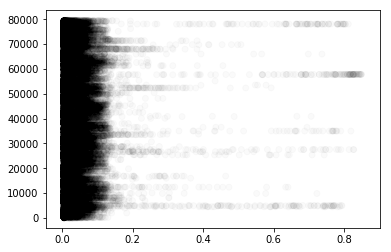

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_train_predict.ravel(),range(0,len(y_train_predict)),c=Y_train_binary.ravel(),alpha=0.02, cmap='gray')

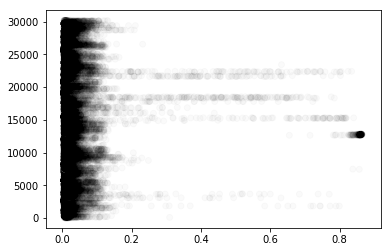

In [89]:
plt.scatter(y_test_predict.ravel(),range(0,len(y_test_predict)),c=Y_test_binary.ravel(),alpha=0.02, cmap='gray')

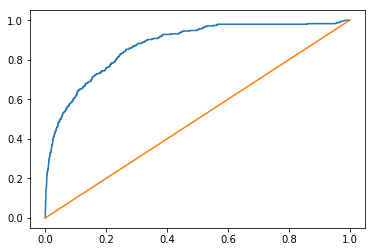

In [90]:
plt.plot(roc_data[0], roc_data[1])
plt.plot(roc_data[1], roc_data[1])
#plt.plot(roc_data[2], roc_data[1])

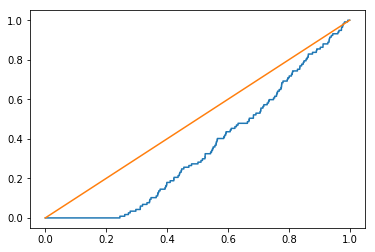

In [91]:
plt.plot(roc_data_test[0], roc_data_test[1])
plt.plot(roc_data_test[1], roc_data_test[1])
#plt.plot(roc_data[2], roc_data[1])

In [106]:
df_egr_train_pred = pd.DataFrame({'pred':y_train_predict.ravel(), 'label': Y_train_binary.ravel()})

In [241]:
df_egr_test_pred = pd.DataFrame({'pred':y_test_predict.ravel(), 'label': Y_test_binary.ravel()})

In [108]:
df_win1 = df_egr_train_pred[df_egr_train_pred['label']>0.5]

In [242]:
df_win1_test = df_egr_test_pred[df_egr_test_pred['label']>0.5]

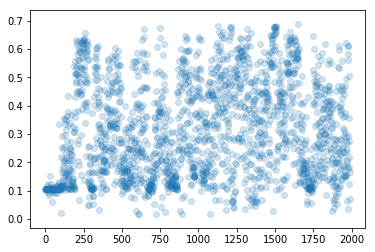

In [126]:
plt.scatter(range(0,1988), df_win1['pred'], alpha=0.2)

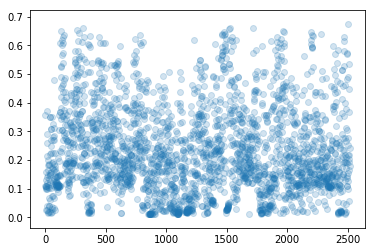

In [245]:
plt.scatter(range(0,2518), df_win1_test['pred'], alpha=0.2)

In [246]:
df_win2_test = df_egr_test_pred[df_egr_test_pred['label']<0.5]

In [113]:
df_win2 = df_egr_train_pred[df_egr_train_pred['label']<0.5]

In [248]:
#df_win2_test.describe()

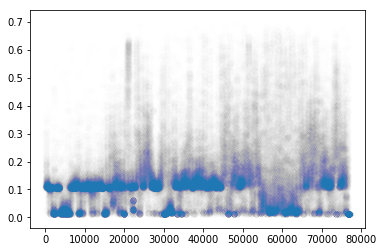

In [123]:
plt.scatter(range(0,77096), df_win2['pred'], alpha=0.002)

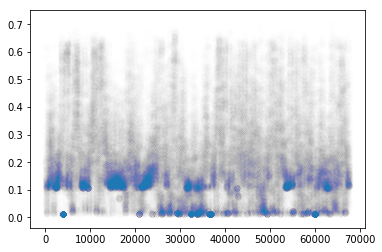

In [249]:
plt.scatter(range(0,67707), df_win2_test['pred'], alpha=0.002)

In [130]:
def thres_pred(lis,thres=0.5):
    return list(map(lambda x: 1 if x>=thres else 0, lis))

In [ ]:
df_egr_train_pred['pred'], df_egr_train_pred['label']

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
pr=[]
rec=[]
acc=[]
cm_ls=[]
for thres in roc_data[2]:
    pred_tmp = thres_pred(thres=thres,lis=df_egr_train_pred['pred'] )
    cm_ls.append(cm(df_egr_train_pred['label'], pred_tmp))
    pr.append(precision_score(df_egr_train_pred['label'], pred_tmp))
    rec.append(recall_score(df_egr_train_pred['label'], pred_tmp))
    acc.append(accuracy_score(df_egr_train_pred['label'], pred_tmp))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [250]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
prt=[]
rect=[]
acct=[]
cm_lst=[]
for thres in roc_data_test[2]:
    pred_tmp = thres_pred(thres=thres,lis=df_egr_test_pred['pred'] )
    cm_lst.append(cm(df_egr_test_pred['label'], pred_tmp))
    prt.append(precision_score(df_egr_test_pred['label'], pred_tmp))
    rect.append(recall_score(df_egr_test_pred['label'], pred_tmp))
    acct.append(accuracy_score(df_egr_test_pred['label'], pred_tmp))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [255]:
max(prt)

0.08333333333333333

In [143]:
max(acc)

0.9748621718678873

In [184]:
df_egr_train_pred_score = pd.DataFrame({'cm_TN':list(map( lambda x: x[0][0], cm_ls)), 'cm_TP':list(map( lambda x: x[1][1], cm_ls)), 'cm_FN':list(map( lambda x: x[1][0], cm_ls)), 'cm_FP':list(map( lambda x: x[0][1], cm_ls)), 'pr':pr, 'rec':rec, 'acc':acc, 'thres':roc_data[2]})

In [251]:
df_egr_test_pred_score = pd.DataFrame({'cm_TN':list(map( lambda x: x[0][0], cm_lst)), 'cm_TP':list(map( lambda x: x[1][1], cm_lst)), 'cm_FN':list(map( lambda x: x[1][0], cm_lst)), 'cm_FP':list(map( lambda x: x[0][1], cm_lst)), 'pr':prt, 'rec':rect, 'acc':acct, 'thres':roc_data_test[2]})

In [219]:
# df_egr_train_pred_score[df_egr_train_pred_score['cm_FN']<400]
# plt.hist(df_egr_train_pred_score['acc'].values)
(df_egr_train_pred_score[df_egr_train_pred_score['acc']>0.8]).sort_values(['cm_TP','pr'], ascending=False).head(22)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
2100,62143,1153,835,14953,0.071588,0.579980,0.800364,0.239928
2098,62189,1152,836,14907,0.071735,0.579477,0.800933,0.240453
2099,62143,1152,836,14953,0.071531,0.579477,0.800352,0.239929
2096,62238,1151,837,14858,0.071897,0.578974,0.801540,0.240988
2097,62189,1151,837,14907,0.071678,0.578974,0.800921,0.240456
2094,62306,1150,838,14790,0.072146,0.578471,0.802387,0.241617
2095,62238,1150,838,14858,0.071839,0.578471,0.801527,0.240991
2092,62312,1149,839,14784,0.072114,0.577968,0.802451,0.241671
2093,62306,1149,839,14790,0.072087,0.577968,0.802375,0.241619
2090,62313,1148,840,14783,0.072061,0.577465,0.802451,0.241679


In [252]:
(df_egr_test_pred_score[df_egr_test_pred_score['acc']>0.8]).sort_values(['cm_TP','pr'], ascending=False).head(22)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
968,55739,488,2030,11968,0.039178,0.193805,0.800669,0.365553
969,55710,488,2030,11997,0.039087,0.193805,0.800256,0.365113
970,55708,488,2030,11999,0.039081,0.193805,0.800228,0.365102
966,55772,487,2031,11935,0.039205,0.193407,0.801125,0.366030
967,55739,487,2031,11968,0.039101,0.193407,0.800655,0.365571
964,55773,486,2032,11934,0.039130,0.193010,0.801125,0.366094
965,55772,486,2032,11935,0.039127,0.193010,0.801111,0.366058
962,55827,485,2033,11880,0.039224,0.192613,0.801880,0.366890
963,55773,485,2033,11934,0.039053,0.192613,0.801111,0.366097
960,55843,484,2034,11864,0.039197,0.192216,0.802093,0.367123


In [226]:
(df_egr_train_pred_score[df_egr_train_pred_score['pr']>0.1]).sort_values(['cm_TP','acc'], ascending=False).head(10)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
1408,69959,795,1193,7137,0.100227,0.399899,0.894669,0.351392
1406,69965,794,1194,7131,0.100189,0.399396,0.894732,0.351564
1407,69959,794,1194,7137,0.100113,0.399396,0.894656,0.351453
1404,69975,793,1195,7121,0.100202,0.398893,0.894846,0.351732
1405,69965,793,1195,7131,0.100076,0.398893,0.894720,0.351581
1402,69992,792,1196,7104,0.100304,0.398390,0.895048,0.352210
1403,69975,792,1196,7121,0.100088,0.398390,0.894833,0.351733
1400,70003,791,1197,7093,0.100330,0.397887,0.895175,0.352582
1401,69992,791,1197,7104,0.100190,0.397887,0.895036,0.352210
1398,70010,790,1198,7086,0.100305,0.397384,0.895251,0.352789


In [299]:
(df_egr_test_pred_score[df_egr_test_pred_score['pr']>0.04199]).sort_values(['cm_TP','acc'], ascending=False).head(10)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
2206,42544,1103,1415,25163,0.041993,0.438046,0.621531,0.230706
141,66165,71,2447,1542,0.044017,0.028197,0.943197,0.590117
137,66210,70,2448,1497,0.044671,0.027800,0.943823,0.591814
138,66171,70,2448,1536,0.043587,0.027800,0.943268,0.590231
139,66169,70,2448,1538,0.043532,0.027800,0.943240,0.590227
140,66165,70,2448,1542,0.043424,0.027800,0.943183,0.590168
135,66218,69,2449,1489,0.044288,0.027403,0.943923,0.592015
136,66210,69,2449,1497,0.044061,0.027403,0.943809,0.591835
133,66224,68,2450,1483,0.043843,0.027006,0.943994,0.592159
134,66218,68,2450,1489,0.043674,0.027006,0.943909,0.592024


In [206]:
(df_egr_train_pred_score[df_egr_train_pred_score['rec']>0.7]).sort_values(['acc'], ascending=False).head()

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
2599,53874,1392,596,23222,0.056553,0.700201,0.698827,0.176299
2601,53863,1394,594,23233,0.056605,0.701207,0.698713,0.176216
2600,53863,1392,596,23233,0.056528,0.700201,0.698687,0.176224
2603,53820,1395,593,23276,0.056544,0.701710,0.698182,0.175929
2602,53820,1394,594,23276,0.056506,0.701207,0.698169,0.175933


In [291]:
(df_egr_test_pred_score[df_egr_test_pred_score['rec']>0.5]).sort_values(['acc'], ascending=False).head()

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
2531,38479,1260,1258,29228,0.041328,0.500397,0.565881,0.203328
2533,38468,1262,1256,29239,0.041376,0.501191,0.565753,0.203202
2532,38468,1260,1258,29239,0.041313,0.500397,0.565724,0.203216
2535,38442,1263,1255,29265,0.041372,0.501589,0.565397,0.203038
2534,38442,1262,1256,29265,0.041340,0.501191,0.565383,0.203040


Text(0, 0.5, 'Precision')

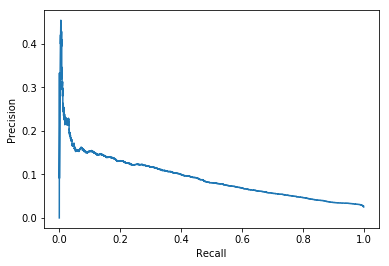

In [223]:
plt.plot(df_egr_train_pred_score['rec'], df_egr_train_pred_score['pr'])
plt.xlabel('Recall')
plt.ylabel('Precision')

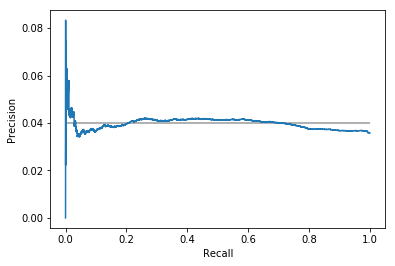

In [296]:
plt.plot(df_egr_test_pred_score['rec'], df_egr_test_pred_score['pr'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.hlines(0.04, 0.0, 1.0, alpha=0.4)

In [303]:
(df_egr_test_pred_score[df_egr_test_pred_score['acc']>0.6]).sort_values(['cm_TP','rec'], ascending=False).head(10)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
2332,41021,1166,1352,26686,0.041864,0.463066,0.600740,0.219924
2330,41024,1165,1353,26683,0.041834,0.462669,0.600769,0.219935
2331,41021,1165,1353,26686,0.041830,0.462669,0.600726,0.219925
2328,41038,1164,1354,26669,0.041821,0.462272,0.600954,0.220051
2329,41024,1164,1354,26683,0.041800,0.462272,0.600755,0.219942
2326,41068,1163,1355,26639,0.041832,0.461875,0.601367,0.220304
2327,41038,1163,1355,26669,0.041786,0.461875,0.600940,0.220056
2324,41094,1162,1356,26613,0.041836,0.461477,0.601723,0.220486
2325,41068,1162,1356,26639,0.041797,0.461477,0.601353,0.220304
2322,41139,1161,1357,26568,0.041870,0.461080,0.602350,0.220766


In [318]:
(X_test_list[0].shape)

(469, 335)

In [314]:
X_test.columns

Index(['distance_idle%', 'distance_overrun%', 'distance_decel%',
       'distance_accel%', 'distance_cruise%', 'statedwell_km', 'time_idle%',
       'time_overrun%', 'time_decel%', 'time_accel%',
       ...
       'FUEL_CONSUM_kurtosis', 'FUEL_CONSUM_skewness',
       'VEHICAL_BATTERY_POTENTIAL_mean', 'VEHICAL_BATTERY_POTENTIAL_median',
       'VEHICAL_BATTERY_POTENTIAL_variance', 'VEHICAL_BATTERY_POTENTIAL_max',
       'VEHICAL_BATTERY_POTENTIAL_min', 'VEHICAL_BATTERY_POTENTIAL_max-min',
       'VEHICAL_BATTERY_POTENTIAL_kurtosis',
       'VEHICAL_BATTERY_POTENTIAL_skewness'],
      dtype='object', length=269)

In [313]:
df_egr_train_pred.shape

(79084, 2)

In [310]:
len(df_egr_test_pred)

70225

In [ ]:
# veh count
points=0
flen=0
fc=0
TN=0
TP=0
FP=0
FN=0
OT= 0.111 #0.203328


for df1 in X_test_list[0:]: # X_train_list
       
    __x=df1[col_list_335].copy()
    __x.fillna(method='ffill', inplace=True)
    __x.fillna(method='bfill', inplace=True)
    __x.fillna(value=0, inplace=True)
    if(len(__x)>0): 
        _x = rs1.transform(__x)
        # output in test mode = 0
        bottleneck_output = get_layer_output([__x,0])[0]  # bottleneck representation
        y_pred = Clf_rad_v21.predict(bottleneck_output)

        df2=pd.DataFrame(y_pred)
        #points=points+len(y_pred)
        #if (min(df2[0])<= 0.966): l1[vin]=1-min(df2[0])
        df3=df1[df1['ANN_Radiator']!='N'][['statedwell_km']] 
        df3['Measurement in KM'] = df3['statedwell_km']

        if(len(df3)==0):
            if(df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].shape[0]==0): TN+=1
            else: FP+=1
        else: 
            if((df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].min() <= df3['Measurement in KM'].min() ) & (df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].min() )): TP+=1
            elif((df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].min() <= df3['Measurement in KM'].max() ) & (df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].max() )): TP+=1 
            elif(df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].shape[0]==0): FN+=1
            else: FN+=1

        #print(vin)
        #flen=flen+(len(df3['Measurement in KM'].unique()))
        fc=fc+1
   

In [ ]:
print(TN, TP, FN, FP ) # test set @ 0.111

In [424]:
print(TN, TP, FN, FP ) # test set @ 0.12

103 9 46 16


In [413]:
print(TN, TP, FN, FP ) # test set @ 0.203328

105 8 47 14


In [409]:
print(TN, TP, FN, FP ) # test set @ 0.230706

105 8 47 14


In [411]:
print(TN, TP, FN, FP ) # test set @ 0.590117

119 0 55 0


In [389]:
print(TN, TP, FN, FP ) # tr .113

110 7 33 24


In [407]:
print(TN, TP, FN, FP ) # train set @ 0.1105#001

0 40 0 134


In [376]:
print(TN, TP, FN, FP ) # train set @ 0.176299 

114 5 35 20


In [378]:
print(TN, TP, FN, FP ) # train set @ 0.239928 

114 5 35 20


In [373]:
print(TN, TP, FN, FP ) # train set @ 0.351392

123 3 37 11


0

In [371]:
__x.fillna(method='ffill', inplace=True)
__x.fillna(method='bfill', inplace=True)
__x.fillna(value=0, inplace=True)
__x.dropna().shape

(429, 269)

In [370]:
(__x.describe().iloc[0]).sort_values(ascending=True)

power[75,inf]_min                       0.0
power[75,inf]_median                    0.0
power[75,inf]_kurtosis                  0.0
power[75,inf]_skewness                  0.0
power[75,inf]_mean                      0.0
power[75,inf]_variance                  0.0
power[75,inf]_max                       0.0
power[-inf,-10]_max-min               429.0
power[-10,0]_variance                 429.0
power[-10,0]_median                   429.0
power[-10,0]_mean                     429.0
power[-10,0]_count                    429.0
EFF_TORQUE_mean                       429.0
EFF_TORQUE_median                     429.0
EFF_TORQUE_variance                   429.0
EFF_TORQUE_max                        429.0
EFF_TORQUE_min                        429.0
EFF_TORQUE_max-min                    429.0
EFF_TORQUE_kurtosis                   429.0
EFF_TORQUE_skewness                   429.0
power[-inf,-10]_kurtosis              429.0
Power_mean                            429.0
Power_variance                  

In [4]:
bucket="relai.poc.temp"
file_extn='.csv'
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from d2 import get_vin_list
f1=get_vin_list(bucket=bucket, folder_base='res/1/', file_extn=file_extn)  #reading source
#'s3://{}/{}{}.csv'.format(bucket,'res/1',vin)
setA=set(list(pd.read_csv('ANOVA_EGR.csv')['Feature'])[0:54] ) 
setB=set(['power[0,25]_count %', 'power[75,inf]_count %', 'power[25,75]_count %'])
col_list = list(setA-setB)  # Annova top 51
             
# predictions
from keras import backend as K# with a Sequential model
ib=1
get_layer_output = K.function([autoencoder_egr.layers[0].input], [autoencoder_egr.layers[ib].output])


In [10]:
f1=get_vin_list(bucket=bucket, folder_base='res/1/', file_extn=file_extn)  #reading source
for vin in f1[0:]:
    df1=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'res/1/',vin))
    #df1.columns=[str(i) for i in (df1.columns)]
    c_df3=0
    try:
        df3=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'jcd/',vin))
        c_df3=1
    except:
        c_df3=0
    # y_pred = autoencoder_egr.predict()  # Reconstruction
    try:
        _x=df1[col_list]
        # output in test mode = 0
        bottleneck_output = get_layer_output([_x,0])[0]  # bottleneck representation
        y_pred = predictor_egr.predict(bottleneck_output)
        df2=pd.DataFrame(y_pred)
        '''
        df1=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'res/1/',vin))
        df2=pd.DataFrame(y_pred)
        df3=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'jcd/',vin))
        '''
        plt.figure()
        try: sns.kdeplot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], alpha=0.8,legend=False)
        except: pass
        if (c_df3==1): plt.vlines(df3['Measurement in KM'],0,1)
        plt.vlines(df1[np.isnan(df2[0])]['statedwell_km'],0,1, colors='red', alpha=0.05) #'ENGINE_SPEED_x_count',
        #plt.vlines(df1[df1['ENGINE_SPEED_x_count']<5]['statedwell_km'],0,1, colors='red', alpha=0.03) #
        ax2=plt.twinx()
        ax2.plot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], 1-df2[df2[0]<0.966][0], alpha=0.4)
        ax2.set_ylim(0,1)
        plt.legend().set_visible(False)
        plt.title('EGR failure prediction for {}'.format(vin))
        doc = 'temp.png'
        plt.savefig(doc)
        from boto3 import resource
        s3 = resource('s3')
        from os import remove
        s3.Bucket(bucket).Object('res/8/{}.png'.format(vin)).upload_file(doc)
        remove(doc)
        plt.clf()
        print(vin)
    except: pass

MB1A3CHD2JAEH9187
MB1A3EHD2JPGC1112
MB1A3EHD3JPBE1810
MB1A3EHD5JAGH5930
MB1A3EHDXJAHH5103
MB1CTCFD0HAEG4824
MB1CTCFD3HAEG4803
MB1CTCFD6HAEG4844
MB1CTCHD0HAJH3802
MB1CTCHD0HAVH2225
MB1CTCHD0HEXZ0162
MB1CTCHD0JPAE7090
MB1CTCHD0JPHB6359
MB1CTCHD1HEXY9828
MB1CTCHD1JPGB8828
MB1CTCHD2HAVH2209
MB1CTCHD2HEVZ4367
MB1CTCHD3HEVZ3678
MB1CTCHD3HPWA4775
MB1CTCHD4HAAG7582


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MB1CTCHD4HPWA5613
MB1CTCHD4JADJ1242
MB1CTCHD5HPJB2216
MB1CTCHD5JPEC8773
MB1CTCHD6JPEC8779
MB1CTCHD6JPEC8782
MB1CTCHD6JPEC9172
MB1CTCHD7JAGH6526
MB1CTCHD8HPWA3573
MB1CTCHD8JPEC8783
MB1CTCHD9HPWA4778
MB1CTCHD9JAHH4408
MB1CTCHD9JPEC9005
MB1CTCHD9JPGC1217
MB1JADHD0JRGW0273
MB1KACFD7HPGX1732
MB1KACHD0JPHB8128
MB1KACHD1JRGW2953
MB1KACHD2HEVZ4497
MB1KACHD2JPGC2162
MB1KACHD3HAJH3312
MB1KACHD3JPGC1778
MB1KACHD4HRWU7757
MB1KACHD4JRHV9161
MB1KACHD5HEJZ5499
MB1KACHD6HEJZ5205
MB1KACHD6HRWU6299
MB1KACHD6JRFW8650
MB1KACHD6JRGW3886
MB1KACHD6JRHV7539
MB1KACHD6JRHV9534
MB1KACHD7HEVZ2552
MB1KACHD7HPJB3207
MB1KACHD8HRWU7762
MB1KACHD8JPHB4554
MB1KACHD8JPHB6241
MB1KACHD9JPGB9890
MB1KACHD9JRHV8880
MB1KACHDXHAVH2301
MB1KACHDXJRHV9455
MB1KADYD2HPEY0142
MB1NACHD0HAVH1462
MB1NACHD0HPXA1107
MB1NACHD0JAHH4327
MB1NACHD0JRHV6500
MB1NACHD1HRVV1159
MB1NACHD2HRVU8948
MB1NACHD2HRWU8175
MB1NACHD3HPVA6182
MB1NACHD4JAHH4217
MB1NACHD4JPHB7061
MB1NACHD5HPWA3996
MB1NACHD5JEGZ9945
MB1NACHD6HPJA9422
MB1NACHD7HRVV1456
MB1NACHD7J

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
vin#pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'res/1/',f1[1])) #list(df1.columns)#=[str(i) for i in (df1.columns)]

'MB1A3CHD8JEHZ9434'

In [193]:
# (df2[df2[0]<0.966][0])

Text(0.5, 1.0, 'EGR failure prediction for MB1CTCHD0HAVH2225')

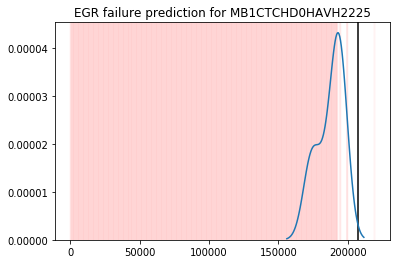

In [170]:
'''
sns.kdeplot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'])
plt.vlines(df3['Measurement in KM'],0,1)
#plt.vlines(df1[np.isnan(df2[0])]['statedwell_km'],0,1, colors='red', alpha=0.05) #'ENGINE_SPEED_x_count',
plt.vlines(df1[df1['ENGINE_SPEED_x_count']<5]['statedwell_km'],0,1, colors='red', alpha=0.03) #
plt.legend().set_visible(False)
plt.title('EGR failure prediction for {}'.format(vin))
'''

(0, 1)

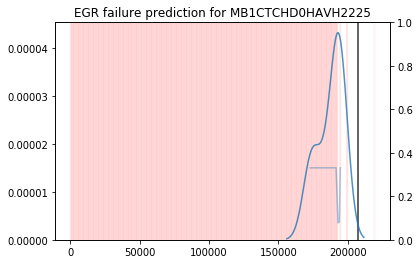

In [201]:
sns.kdeplot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], alpha=0.8)
plt.vlines(df3['Measurement in KM'],0,1, alpha=0.8)
#plt.vlines(df1[np.isnan(df2[0])]['statedwell_km'],0,1, colors='red', alpha=0.05) #'ENGINE_SPEED_x_count',
plt.vlines(df1[df1['ENGINE_SPEED_x_count']<5]['statedwell_km'],0,1, colors='red', alpha=0.03) #
plt.legend().set_visible(False)
plt.title('EGR failure prediction for {}'.format(vin))
ax2=plt.twinx()
ax2.plot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], 1-df2[df2[0]<0.966][0], alpha=0.4)
ax2.set_ylim(0,1)
#ax2.plot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], df2[df2[0]<0.966][0])


In [39]:
#bottleneck
autoencoder_egr.get_layer('bottleneck').shape

In [85]:
from keras import backend as K
# with a Sequential model
get_layer_output = K.function([autoencoder_egr.layers[0].input], [autoencoder_egr.layers[1].output])
# output in test mode = 0
x=df1[col_list].head(2)
bottleneck_output = get_layer_output([x])[0]

In [86]:
layer_output

array([[-1.,  1., -1.,  1.,  1.,  1., -1., -1.],
       [nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [58]:
#autoencoder_egr.get_config()

In [62]:
 for i in range(0,4):
    get_layer_output = K.function([autoencoder_egr.layers[0].input], [autoencoder_egr.layers[i].output])
    # output in test mode = 0
    x=df1[col_list].head(1)
    layer_output = get_layer_output([x,0])[0]
    print(i, layer_output.shape)

0 (1, 16)
1 (1, 8)
2 (1, 16)
3 (1, 51)


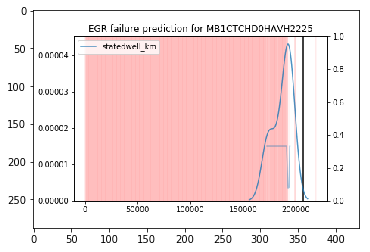

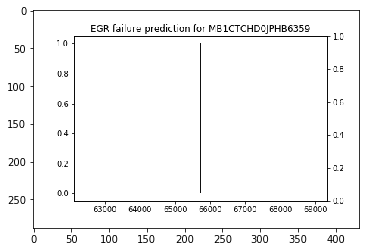

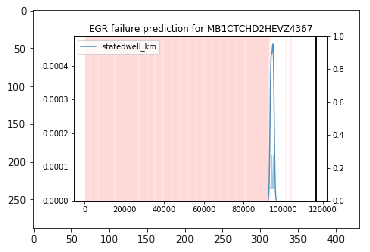

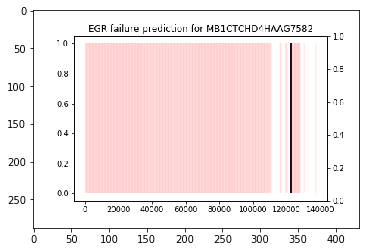

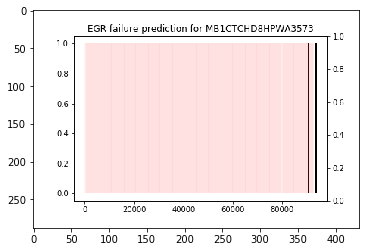

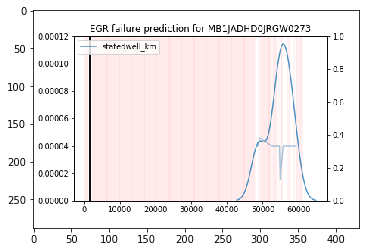

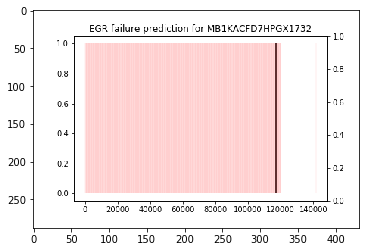

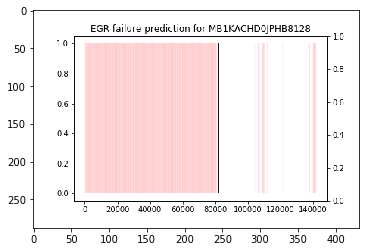

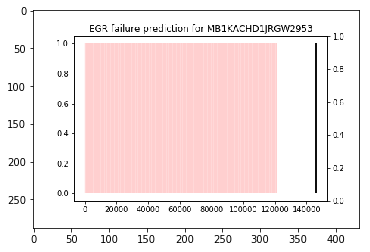

In [269]:
#f6=get_vin_list(bucket=bucket, folder_base='res/7/', file_extn='.png')  #reading source
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import boto3
import io
import tempfile
bucket="relai.poc.temp"
s3 = boto3.resource('s3', region_name='us-east-1')
bucket = s3.Bucket(bucket)
for i in f6[0:9]:
    #print('s3://{}/res/7/{}.png'.format(bucket,i))
    #plt.imread('s3://{}/res/7/{}.png'.format(bucket,i))
    object = bucket.Object('res/7/{}.png'.format(i))
    file_stream = io.BytesIO()
    object.download_fileobj(file_stream)
    #img = plt.imread(file_stream)
    #plt.imshow(img)
    tmp = tempfile.NamedTemporaryFile()
    with open(tmp.name, 'wb') as f:
        object.download_fileobj(f)
        img=mpimg.imread(tmp.name)
        plt.imshow(img)
        # ...Do jobs using img
    plt.show()
    